In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('darkgrid')

In [2]:
netflix_data = pd.read_csv('netflix_titles.csv')

netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
netflix_data.shape

(7787, 12)

In [4]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
netflix_data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


## STEP 3

Data type conversion and Handling Nulls

In [6]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

DIRECTOR AND CAST FILLING

In [7]:
netflix_data['director'] = netflix_data['director'].fillna('Unknown')
netflix_data['cast'] = netflix_data['cast'].fillna('Unknown')

In [8]:
netflix_data.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

COUNTRY

In [9]:
netflix_data['country'].mode()

0    United States
Name: country, dtype: object

In [10]:
netflix_data['country'] = netflix_data['country'].fillna(netflix_data['country'].mode()[0])

In [12]:
netflix_data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

date_added

In [13]:
netflix_data.dropna(subset=['date_added', 'rating'], inplace=True)

In [14]:
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
netflix_data['date_added']

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7770, dtype: object

In [16]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], format='mixed', dayfirst=False)

In [17]:
netflix_data['date_added']

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7770, dtype: datetime64[ns]

In [18]:
netflix_data['year_added'] = netflix_data['date_added'].dt.year

In [19]:
netflix_data['year_added'].head()

0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: int32

In [20]:
netflix_data['month_added'] = netflix_data['date_added'].dt.month
netflix_data['month_added'].head()

0     8
1    12
2    12
3    11
4     1
Name: month_added, dtype: int32

## STEP 4 : EDA & VISUALIZATION

type
Movie      5372
TV Show    2398
Name: count, dtype: int64


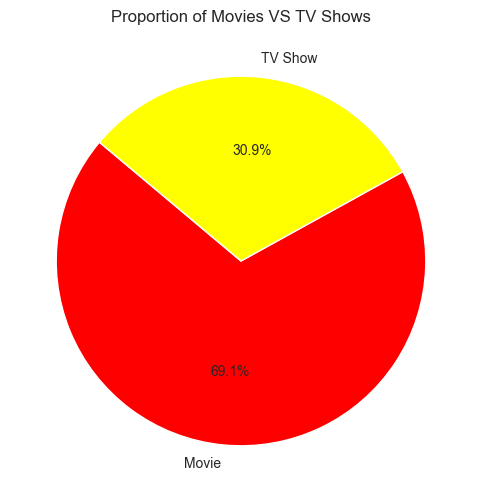

In [21]:
#DISTRIBUTION OF CONTENT TYPE

plt.figure(figsize=(8, 6))
type_counts = netflix_data['type'].value_counts()
print(type_counts)

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'yellow'])

plt.title('Proportion of Movies VS TV Shows')
plt.show()

In [23]:
#HOW HAS CONTENT BEEN ADDED OVER TIME ??

content_added_over_time = netflix_data.groupby(['year_added', 'type']).size().unstack().fillna(0)
content_added_over_time

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,3.0,0.0
2013,6.0,5.0
2014,19.0,6.0
2015,58.0,30.0
2016,256.0,184.0


<Figure size 1400x800 with 0 Axes>

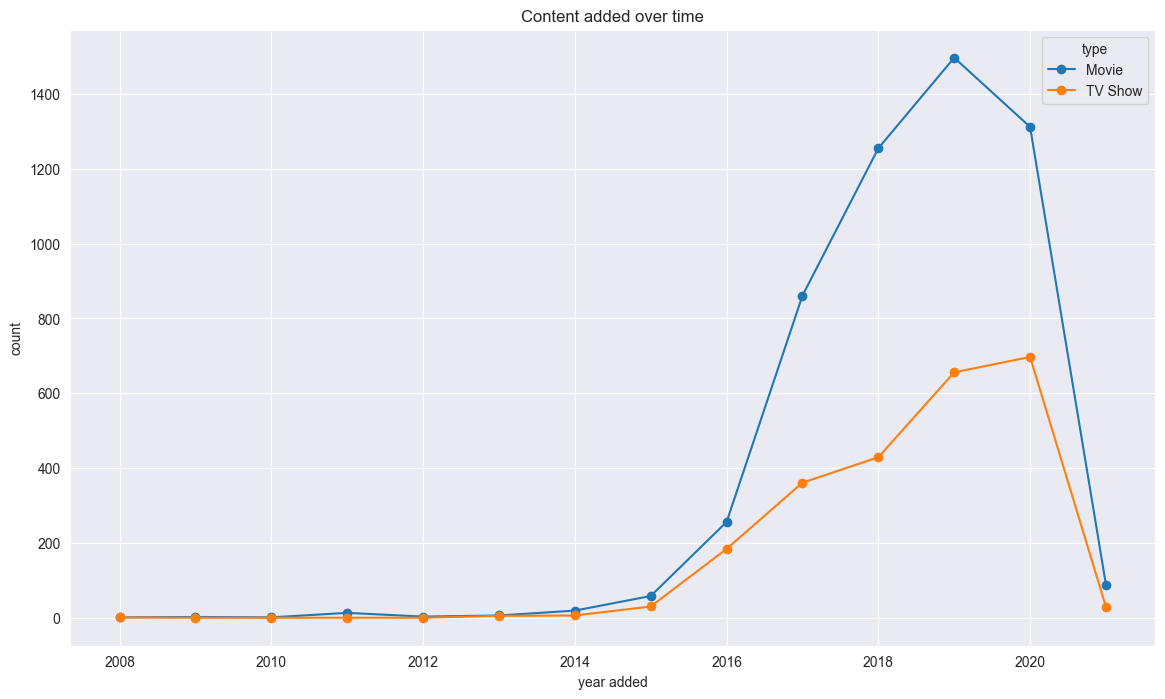

In [24]:
plt.figure(figsize=(14, 8))
content_added_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title("Content added over time")
plt.xlabel('year added')
plt.ylabel('count')
# plt.grid(True)

plt.show()

**insight** : both grew significantly, the addition of movies accelerated much more dramatically, peaking in 2019

#### GENRE

In [25]:
#WHAT IS THE MOST POPULAR GENRES?
netflix_data['listed_in'].head(5)

0    International TV Shows, TV Dramas, TV Sci-Fi &...
1                         Dramas, International Movies
2                  Horror Movies, International Movies
3    Action & Adventure, Independent Movies, Sci-Fi...
4                                               Dramas
Name: listed_in, dtype: object

In [32]:
genres = netflix_data.assign(genre=netflix_data['listed_in'].str.split(r', | & ')).explode('genre')

genres.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,International TV Shows
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,Reality TV
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,Documentaries
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,Music
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,Musicals


In [34]:
top_genres_count = genres['genre'].value_counts().reset_index()
top_genres_count.columns = ['genre', 'count']
top_genres_count

,genre,count
0,International Movies,2437
1,Dramas,2105
2,Comedies,1471
3,International TV Shows,1197
4,Adventure,870
5,Documentaries,786
6,Action,721
7,TV Dramas,703
8,Independent Movies,673
9,Children,532


In [35]:
top_15_genre = top_genres_count.head(15)
print(top_15_genre)


                     genre  count
0     International Movies   2437
1                   Dramas   2105
2                 Comedies   1471
3   International TV Shows   1197
4                Adventure    870
5            Documentaries    786
6                   Action    721
7                TV Dramas    703
8       Independent Movies    673
9                 Children    532
10           Family Movies    532
11         Romantic Movies    531
12             TV Comedies    517
13               Thrillers    491
14          Crime TV Shows    426


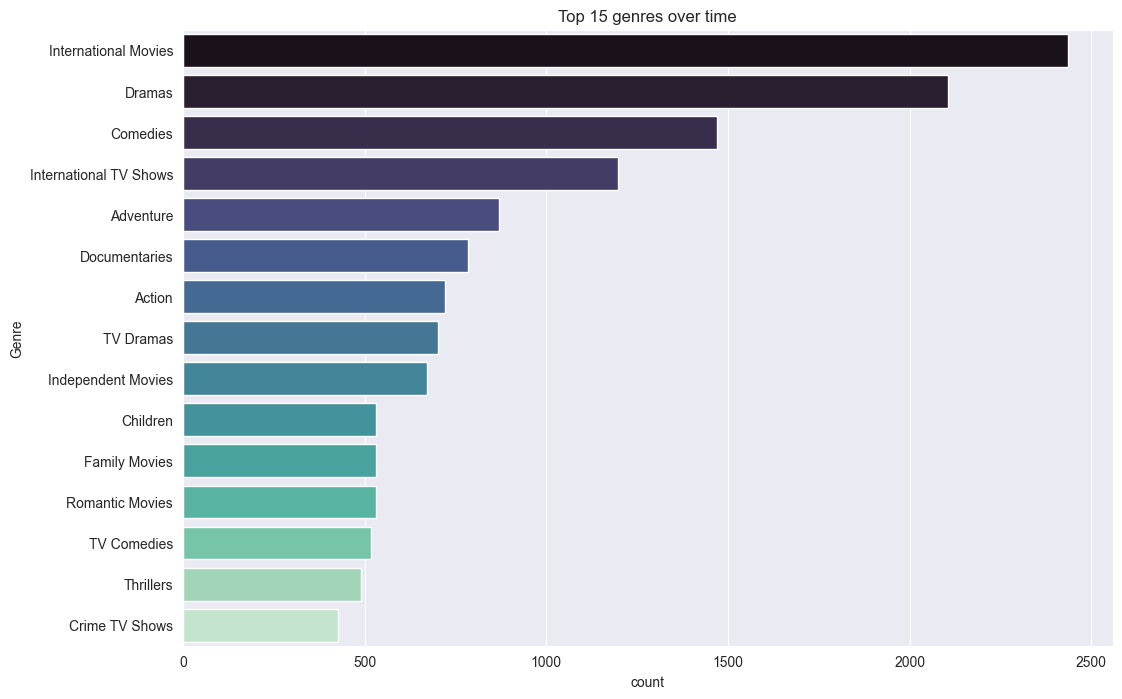

In [36]:
plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_15_genre, palette='mako', hue='genre', legend=False)
plt.title("Top 15 genres over time")
plt.xlabel('count')
plt.ylabel('Genre')
plt.show()

**insights**: "International Movies" is the most common genre tag

##### 4. CONTENT DURATION

In [37]:
movies_data = netflix_data[netflix_data['type'] == 'Movie'].copy()
tv_show_data = netflix_data[netflix_data['type'] == 'TV Show'].copy()


In [38]:
#clearning and converting the duration of MOVIES
movies_data['duration_min'] = movies_data['duration'].str.replace(' min', '').astype(int)

#clearning and converting the duration of TV SHOWS
tv_show_data['seasons'] = tv_show_data['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

In [39]:
movies_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_min
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,78


In [40]:
tv_show_data.tail(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,seasons
7775,s7776,TV Show,Zoids Wild,Unknown,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2020-08-14,2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,2020,8,1
7777,s7778,TV Show,Zombie Dumb,Unknown,Unknown,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,2
7779,s7780,TV Show,Zona Rosa,Unknown,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019-11-26,2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,2019,11,1
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,1


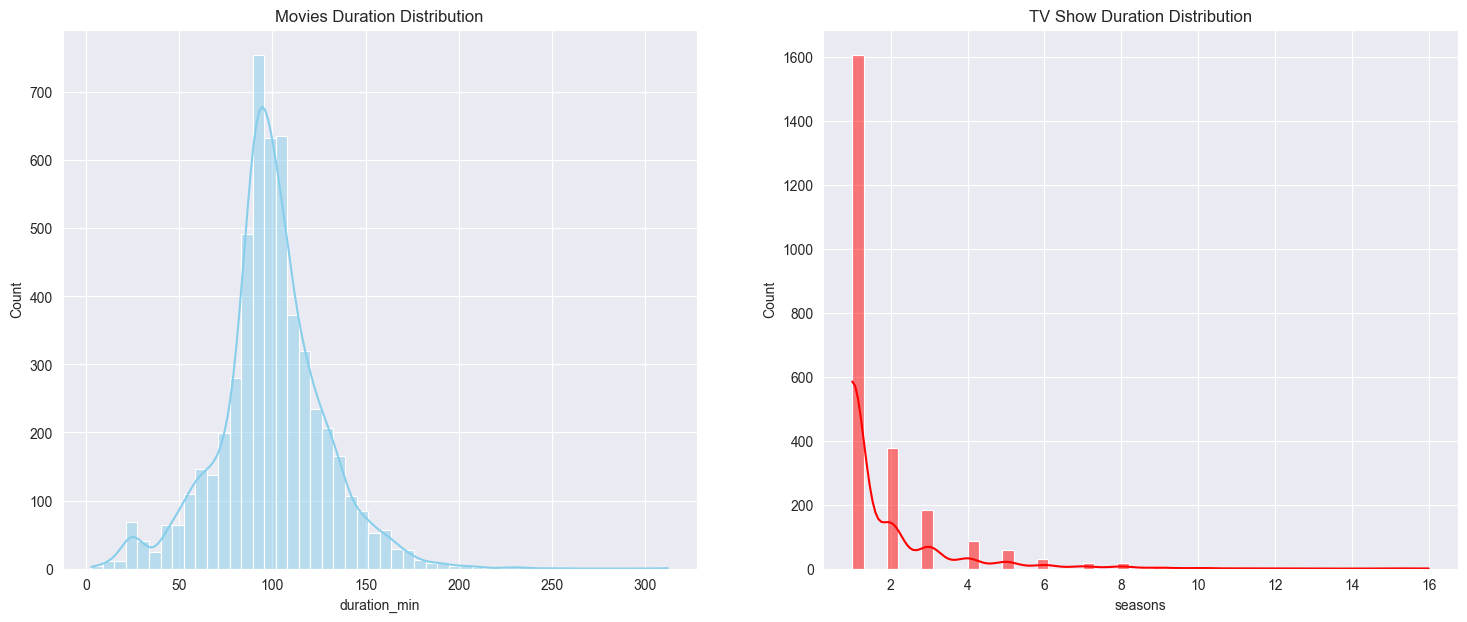

In [41]:
#PLOTTING
fig, axes = plt.subplots(1, 2, figsize= (18, 7))

sns.histplot(ax=axes[0], data=movies_data, x='duration_min', bins=50, kde=True, color='skyblue').set_title("Movies Duration Distribution")

sns.histplot(ax=axes[1], data=tv_show_data, x='seasons', bins=50, kde=True, color='red').set_title("TV Show Duration Distribution")


plt.show()

**insight**:

-   The Majority of movies on Netflix are between 80 and 120 min long, which is standard for feature films.
-   The vast majority of TV Shows on Netflix are short-lived, with most having only 1 season.

##### 5. GEOGRAPHICAL ANALYSIS

In [42]:
# WHERE DOES THE CONTENT COME FROM ??
countries = netflix_data.assign(country = netflix_data['country'].str.split(', ')).explode('country')

In [43]:
top_15_countries = countries['country'].value_counts().reset_index()
top_15_countries.columns = ['country', 'count']

In [44]:
top_15_countries

,country,count
0,United States,3792
1,India,990
2,United Kingdom,721
3,Canada,412
4,France,349
...,...,...
116,Panama,1
117,"United Kingdom,",1
118,Uganda,1
119,East Germany,1


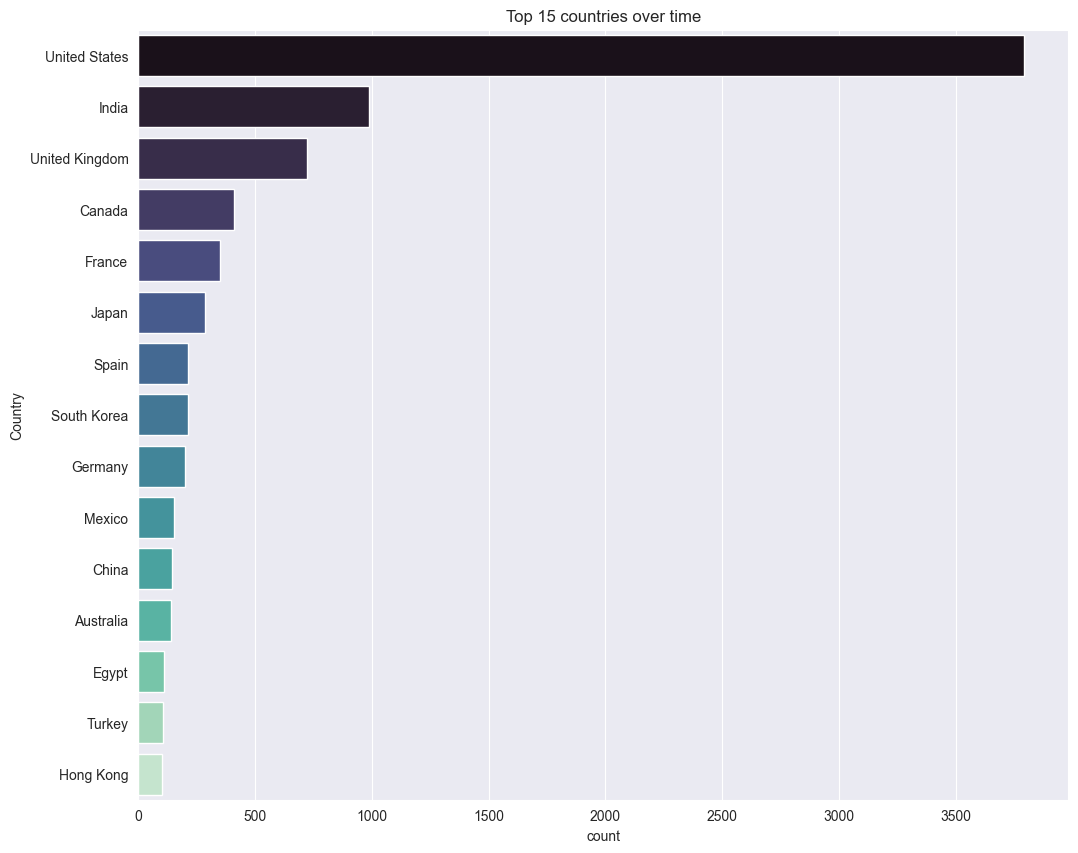

In [46]:
#PLOTTING...
plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_15_countries.head(15), palette='mako', hue='country', legend=False)

plt.title('Top 15 countries over time')
plt.xlabel('count')
plt.ylabel('Country')


plt.show()

**insight** :

-   The united states is by far the producer of content available on netflix

##### 6. MATURITY RATING OF THE CONTENT

In [48]:
netflix_data['rating'].value_counts()

rating
TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

In [47]:
netflix_data['rating'].value_counts().index

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y', 'TV-Y7', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'UR', 'NC-17'],
      dtype='object', name='rating')

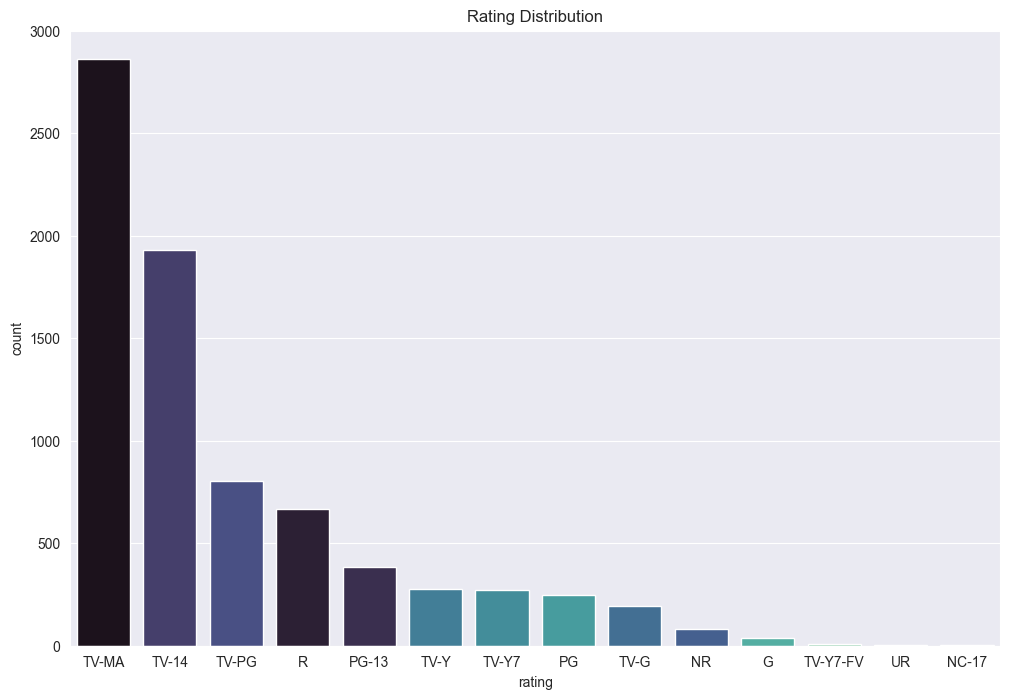

In [49]:
rating_list = netflix_data['rating'].value_counts().index

#plot
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=netflix_data, order=rating_list, hue='rating', palette='mako')
plt.title('Rating Distribution')
plt.show()

## STEP 5

### FEATURE ENGINEERING

content freshness

In [50]:
netflix_data['age_on_netflix'] = netflix_data['year_added'] - netflix_data['release_year']

netflix_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,12


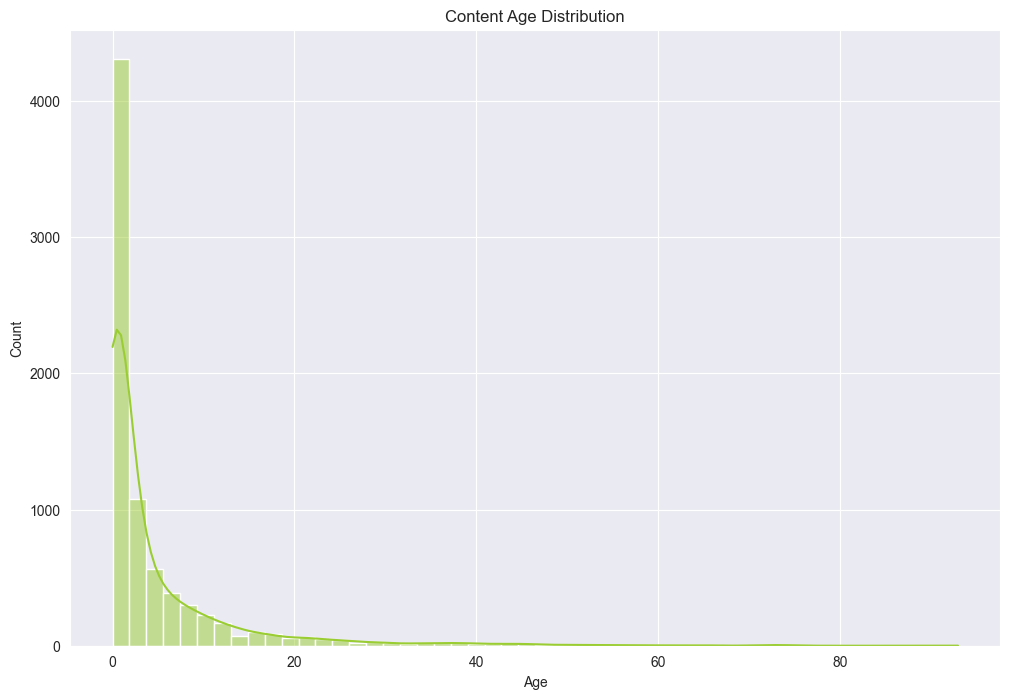

In [53]:
content_age = netflix_data[netflix_data['age_on_netflix'] >= 0]

plt.figure(figsize=(12, 8))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True, color='yellowgreen')
plt.title('Content Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**insights** :

-   Large spike at 0 = majority of the content is added in the same year

In [54]:
genres.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,International TV Shows
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Dramas
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Sci-Fi
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,Fantasy
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Dramas


In [56]:
# analysing movie duration across different top genres

top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()

genres_movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Dramas
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,International Movies
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,International Movies


In [57]:
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

In [58]:
genres_movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre,duration_min
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Dramas,93
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,International Movies,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,International Movies,78


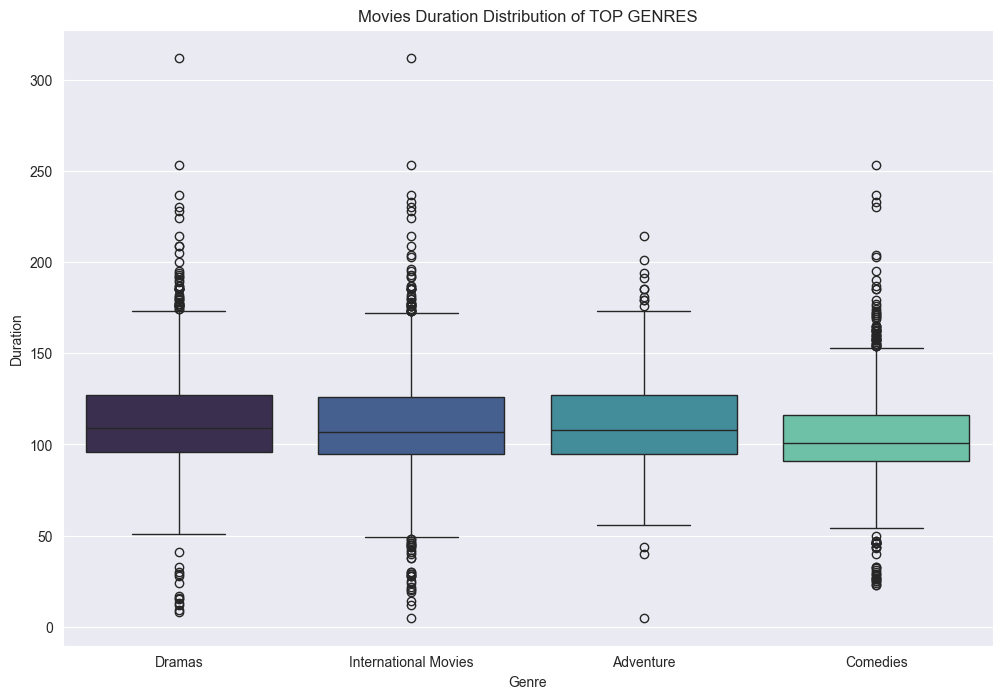

In [60]:
#plotting
plt.figure(figsize=(12, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='mako', hue='genre', legend=False)
plt.title("Movies Duration Distribution of TOP GENRES")
plt.xlabel('Genre')
plt.ylabel('Duration')
plt.show()

## WORD CLOUD

In [62]:
text = ' '.join(netflix_data['description'])

In [63]:
text

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive. When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that\'s haunting their jungle island training camp. In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group. A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack. A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect. After an awful accident, a couple admitted to a grisly hospital are separated and must find each other to escape — before 

In [64]:
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

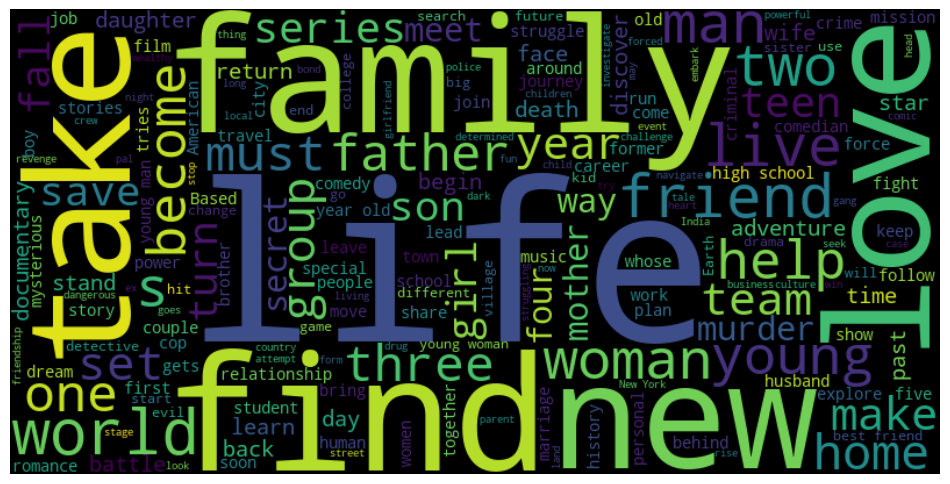

In [65]:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### S.1 TOP DIRECTOR ON NETFLIX

In [67]:
netflix_data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,12
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,6,1
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...,2019,11,22
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019,4,0
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017,12,9


In [69]:
netflix_data[netflix_data['director'].str.contains(',|&', na=False)][['title','director']].head(10)

,title,director
25,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe"
28,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto"
69,14 Cameras,"Scott Hussion, Seth Fuller"
70,14 Minutes from Earth,"Adam Davis, Jerry Kolber, Trey Nelson, Erich S..."
77,2 Alone in Paris,"Ramzy Bedia, Éric Judor"
84,21 & Over,"Jon Lucas, Scott Moore"
106,365 Days,"Barbara Białowąs, Tomasz Mandes"
113,48 Christmas Wishes,"Marco Deufemia, Justin G. Dyck"
135,7 Din Mohabbat In,"Meenu Gaur, Farjad Nabi"
148,A Bad Moms Christmas,"Jon Lucas, Scott Moore"


In [70]:
netflix_data['title'].duplicated().sum()

np.int64(0)

In [73]:
"""
countries = netflix_data.assign(country = netflix_data['country'].str.split(', ')).explode('country')
"""

director_data = netflix_data.assign(director=netflix_data['director'].str.split(r', | & ')).explode('director')


In [74]:
director_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10,15
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,4
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,1
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,1


In [76]:
director_count = director_data['director'].value_counts()
print(director_count)

director
Unknown               2376
Jan Suter               21
Raúl Campos             19
Marcus Raboy            16
Jay Karas               15
                      ... 
Rodrigo Guardiola        1
Gabriel Cruz Rivas       1
Peter Hewitt             1
Josef Fares              1
Miguel Ángel Vivas       1
Name: count, Length: 4479, dtype: int64


In [80]:
top_director = director_data['director'].value_counts().reset_index()
top_director.columns = ['director', 'count']
top_director

,director,count
0,Unknown,2376
1,Jan Suter,21
2,Raúl Campos,19
3,Marcus Raboy,16
4,Jay Karas,15
...,...,...
4474,Rodrigo Guardiola,1
4475,Gabriel Cruz Rivas,1
4476,Peter Hewitt,1
4477,Josef Fares,1


In [81]:
top_10_directors = top_director[1:11]
top_10_directors

,director,count
1,Jan Suter,21
2,Raúl Campos,19
3,Marcus Raboy,16
4,Jay Karas,15
5,Cathy Garcia-Molina,13
6,Jay Chapman,12
7,Youssef Chahine,12
8,Martin Scorsese,12
9,Steven Spielberg,10
10,Shannon Hartman,9


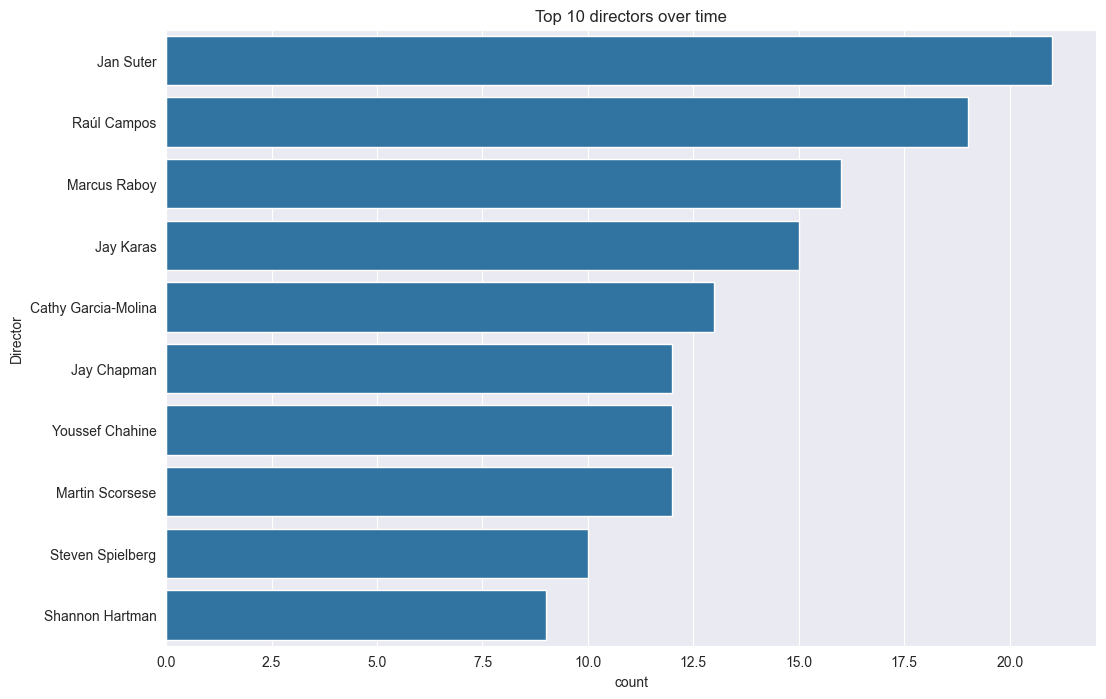

In [82]:
#plotting
plt.figure(figsize=(12, 8))
sns.barplot(y='director', x='count', data=top_10_directors)
plt.title("Top 10 directors over time")
plt.xlabel('count')
plt.ylabel('Director')
plt.show()

**insight**: Jan Suter is the TOP director who has filmed the most movies/series which are there in netflix

### S.2 DISTRIBUTION OF CONTENT RATING CHANGED OVER TIME

### S.3 RELATION B/W CONTENT AGE AND ITS TYPE (MOVIES VS TV SHOWS)

### S.4 ANY TRENDS IN CONTENT PRODUCTION BASED ON THE RELEASE YEAR VS YEAR ADDED IN NETFLIX

### S.5 MOST COMMON WORD PAIRS OR PHRASES IN CONTENT DESCRIPTIONS